# Introduction to Cross-Validation - Lab

## Introduction

In this lab, you'll be able to practice your cross-validation skills!


## Objectives

You will be able to:

- Compare the results with normal holdout validation
- Apply 5-fold cross validation for regression

## Let's get started

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

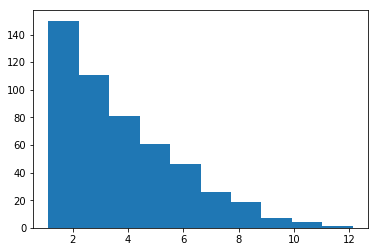

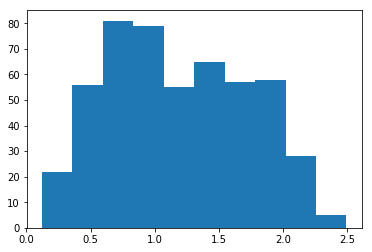

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

len(boston.feature_names)


boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# len(boston_features)
# boston_features.B

b = boston_features["B"]

plt.hist(boston_features.DIS)
plt.show()
logdis = np.log(boston_features["DIS"])

plt.hist(logdis)
plt.show()

loglstat = np.log(boston_features["LSTAT"])

#minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [2]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns = ['target'])
type(X)

pandas.core.frame.DataFrame

## Train test split

Perform a train-test-split with a test set of 0.20.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=.2)

Fit the model and apply the model to the make test set predictions

In [5]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

Calculate the residuals and the mean squared error

In [6]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

32.36111474764486

## Cross-Validation: let's build it from scratch!

### Create a cross-validation function

Write a function k-folds that splits a dataset into k evenly sized pieces.
If the full dataset is not divisible by k, make the first few folds one larger then later ones.

We want the folds to be a list of subsets of data!

In [7]:
def kfolds(data, k):
    # Force data as pandas dataframe
    data = pd.DataFrame(data)
    # add 1 to fold size to account for leftovers
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds #folds should be a list of subsets of data

### Apply it to the Boston Housing Data

In [8]:
boston = pd.concat([X.reset_index(drop=True), y], axis=1)

In [9]:
boston.head()

,CHAS,RM,DIS,B,LSTAT,target
0,0.0,6.575,0.542096,1.000000,-1.275260,24.0
1,0.0,6.421,0.623954,1.000000,-0.263711,21.6
2,0.0,7.185,0.623954,0.989737,-1.627858,34.7
3,0.0,6.998,0.707895,0.994276,-2.153192,33.4
4,0.0,7.147,0.707895,1.000000,-1.162114,36.2


In [10]:
bos_split = kfolds(boston, 5)

### Perform a linear regression for each fold, and calculate the training and test error

Perform linear regression on each and calculate the training and test error.

In [11]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(bos_split) if i!=n])
    test = bos_split[n]
    # Fit a linear regression model
    linreg.fit(train[X.columns], train[y.columns])
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(train[X.columns])
    y_hat_test = linreg.predict(test[X.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[target    24.195577
dtype: float64, target    23.032087
dtype: float64, target    19.745073
dtype: float64, target    15.317101
dtype: float64, target    22.329973
dtype: float64]
[target    13.405145
dtype: float64, target    17.444017
dtype: float64, target    37.032711
dtype: float64, target    58.279544
dtype: float64, target    26.097989
dtype: float64]


## Cross-Validation using Scikit-Learn

This was a bit of work! Now, let's perform 5-fold cross-validation to get the mean squared error through scikit-learn. Let's have a look at the five individual MSEs and explain what's going on.

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

Next, calculate the mean of the MSE over the 5 cross-validations and compare and contrast with the result from the train-test-split case.

In [13]:
cv_5_results

array([-13.40514492, -17.4440168 , -37.03271139, -58.27954385,
       -26.09798876])

##  Summary 

Congratulations! You now practiced your knowledge on k-fold crossvalidation!